**Attibute Information**

| Attribute | Data Type | Description |
| --- | --- | --- |
| state | object | Kode 2 huruf negara bagian tempat tinggal pelanggan AS. |
| account_length | int | Jumlah bulan pelanggan telah menggunakan penyedia telekomunikasi saat ini. |
| area_code | object | 3 digit kode area (AAA). |
| international_plan | object | Pelanggan memiliki paket internasional. |
| voice_mail_plan | object | Pelanggan memiliki paket pesan suara. |
| number_vmail_messages | integer | Jumlah pesan suara. |
| total_day_minutes | float64 | Total menit panggilan sehari. |
| total_day_calls | int64 | Total panggilan sehari. |
| total_day_charge | float64 | Total biaya panggilan harian. |
| total_eve_minutes | float64 | Total menit panggilan petang. |
| total_eve_calls | integer | Total panggilan petang. |
| total_eve_charge | float64 | Total menit panggilan petang. |
| total_night_minutes | float64 | Total menit panggilan malam. |
| total_night_calls | integer | Total panggilan malam. |
| total_night_charge | float64 | Total biaya panggilan malam. |
| total_intl_minutes | float64 | Total menit panggilan internasional. |
| total_intl_calls | integer | Total panggilan internasional. |
| total_intl_charge | float64 | Total biaya panggilan internasional. |
| number_customer_service_calls | integer | Jumlah panggilan ke layanan pelanggan |
| churn | object | pelanggan kabur/memutuskan untuk tidak lagi menggunakan layanan dari penyedia jasa telekomunikasi |

**Dataset Context**

Berdasarkan pembacaan dari dataset, dapat dipahami bahwa dataset ini disediakan untuk mengetahui customer yang melakukan churn dengan yang tidak.

**Problem Statement**

Bagaimana mengetahui customer yang akan churn dengan yang tidak?

**Goals**
- Menemukan insight dari pola-pola atau faktor-faktor yang saling berkaitan dari customer yang melakukan churn dengan yang tidak.
- Membuat mesin prediksi agar dapat menentukan apakah customer akan melakuakn churn atau tidak.

**Analytical Approach**

Pendekatan yang digunakan yaitu:
  1. Exploratory Data Analytics.
  2. Predictive Analytics (Binary Classification).

**Evaluation Metrics**

The Confusion Matrix:

![untitled image](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

- Metrik evaluasi yang akan digunakan yaitu **F1-Score**, **Recall**, **ROC-AUC (Area Under the Receiver Operating Characteristic Curve)**, dan **AUPRC (Area Under the Precision-Recall Curve)** untuk mengevaluasi model machine learning (ML) yang dikembangkan.
- Adapun alasan mengapa F1-Score, Recall, ROC-AUC, dan AUPRC dipilih sebagai metrik evaluasi dapat dilihat melalui laman berikut:[[medium.com]](https://medium.com/cuenex/advanced-evaluation-metrics-for-imbalanced-classification-models-ee6f248c90ca), [[machinelearningmastery.com]](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)
- Untuk memilih model ML terbaik, disini kita menggunakan PR-AUC sebagai metrik evaluasi yang dijadikan patokan utama dengan melihat nilai persentase tertinggi dari kemampuan model ML dalam memprediksi label.


#**1. Import Library/Packages**

In [1]:
# install category encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.1 MB/s eta 0:00:00


In [2]:
!pip install deepchecks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.8 MB/s eta 0:00:00
  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-py3-none-any.whl size=8480 sha256=9ae5536afd19c9821b5b62ec4361fcfb4930f635604b78ffe8d10240b31239c3
  Stored in directory: /root/.cache/pip/wheels/2b/49/68/62eb262833c0fd5403d3b258bd259b0f71516d2563a960303f
Successfully built PyNomaly
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3


In [3]:
# Common library used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import calendar
import warnings
warnings.filterwarnings('ignore')

# Encoder
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

# Imbalanced Dataset
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTENC, SMOTE

#Preprocessing ML
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.model_selection import cross_validate,cross_val_predict,cross_val_score,ShuffleSplit,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, SelectPercentile
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#metrics evaluation
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, roc_curve

#**2. Load Dataset**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# load dataset from google drive storage
df = pd.read_csv("/content/drive/MyDrive/Dicoding/train.csv")
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [191]:
# check 5 upper rows data in dataset
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [173]:
# check 5 lower rows data in dataset
df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


#**3. Data Prepocessing**

##**Data Cleansing**

###**- Check Missing Values**

In [174]:
# check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [13]:
# check if any missing value in the dataset
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

**Observasi**:
- Tidak ada missing value pada dataset

###**- Check Duplicated Values**

In [14]:
# check if any data duplicated
df.duplicated().sum()

0

**Observasi**:
- Tidak ada terduplikat pada dataset



###**- Drop not Usefull Columns**

In [5]:
# drop column
df = df.drop(columns=['area_code'], axis=1)

#**4. Exploratory Data Analysis (EDA)**

##**Statistical Summary**

In [7]:
# list the columns in the same data type
cat_var = [col for col in df.columns if (df[col].dtype=='O') and (col != 'churn')]
num_var = [col for col in df.columns if (df[col].dtype=='int64') | (df[col].dtype=='float64') ]

In [8]:
# check categorical variable
cat_var

['state', 'international_plan', 'voice_mail_plan']

In [9]:
# check numerical variable
num_var

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

####**- Categorical Features/Variables**

In [10]:
# check descriptive statistics of categorical variables
df[cat_var].describe().T

,count,unique,top,freq
state,4250,51,WV,139
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138


**Observasi:**
- State paling sering muncul yaitu **WV** dengan frekuensi kemunculan sebanyak **139**
- International Plan yang sering muncul yaitu **no** dengan jumlah **3854**
- Voice Mail Plan yang sering muncul yaitu **no** dengan jumlah **3854**

####**- Numerical Features/Variables**

In [11]:
# check descriptive statistics of numerical variables
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


**Observasi:**
- Rata-rata semua kolom berdistribusi secara **normal** (gaussian normal distribution), simple checking dengan melihat perbandingan angka mean dengan median yang tidak memiliki rentang perbedaan angka yang jauh/ekstrem.
- Terlihat bahwa kolom **number_vmail_messages**, **total_intl_calls**, **number_customer_service_calls** memiliki distribusi yang skewness karena tertarik oleh outliers.

##**Univariate Analysis**

####**- Target/Label Analysis**

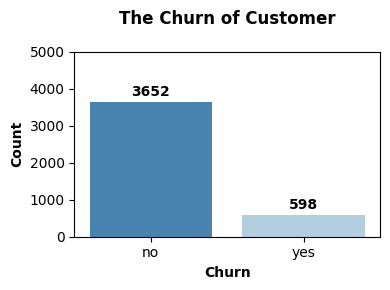

In [13]:
# # visualize each variable (international plan) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='churn',
                  palette="Blues_r",
                  order= df.churn.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,5000)
ax.set_title("The Churn of Customer", weight='bold',pad= 20)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Churn', weight='bold')
plt.tight_layout()
plt.show()

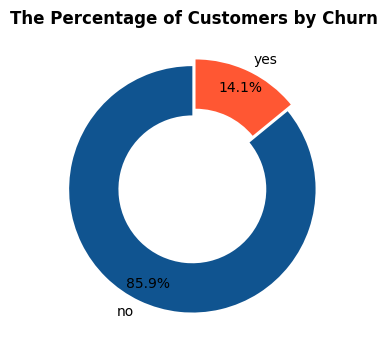

In [38]:
# Count values for the 'churn' column
churn_counts = df['churn'].value_counts()

# Create a donut chart
plt.figure(figsize=(6, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
        colors=['#105490', '#FF5733'], startangle=90,
        wedgeprops=dict(width=0.4), pctdistance=0.85,
        explode=[0.03, 0.03])
plt.title('The Percentage of Customers by Churn', weight='bold')
plt.show()

**Observasi:**
- **Kebanyakan** customer **tidak** melakukan churn yaitu sebesar **3652 orang (85,9%)**, sedangkan hanya **sedikit** yang melakukan churn yaitu sebesar **598 orang (14,1%)**.

####**- Categorical Features/Variables**



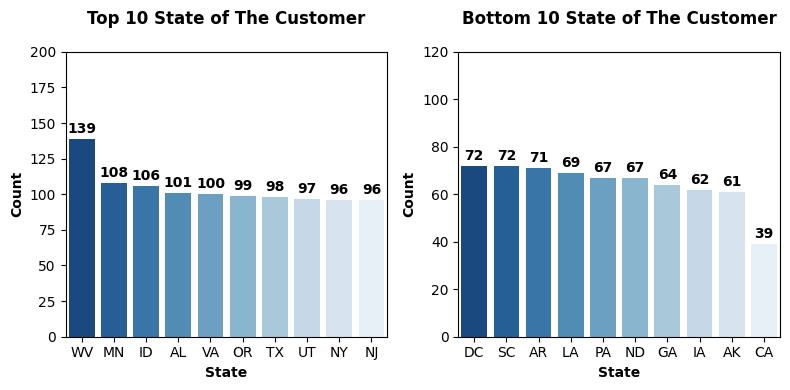

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(8,4)) # 1 row, 2 columns for 2 plots

# The first plot is for the 10 states with the largest number of subscribers
ax1 = sns.countplot(data=df,
                    x='state',
                    palette="Blues_r",
                    order=df.state.value_counts().head(10).index,
                    ax=axes[0]) # Determines the ax used
for bars in ax1.containers:
    ax1.bar_label(bars, label_type='edge', weight='bold', padding=2)
ax1.set_ylim(0,200)
ax1.set_title("Top 10 State of The Customer", weight='bold', pad=20)
ax1.set_ylabel('Count', weight='bold')
ax1.set_xlabel('State', weight='bold')

# The second plot is for the 10 states with the lowest number of subscribers
ax2 = sns.countplot(data=df,
                    x='state',
                    palette="Blues_r",
                    order=df.state.value_counts().tail(10).index,
                    ax=axes[1]) # Determines the ax used
for bars in ax2.containers:
    ax2.bar_label(bars, label_type='edge', weight='bold', padding=2)
ax2.set_ylim(0,120)
ax2.set_title("Bottom 10 State of The Customer", weight='bold', pad=20)
ax2.set_ylabel('Count', weight='bold')
ax2.set_xlabel('State', weight='bold')

plt.tight_layout()
plt.show()

**Observasi:**
- WV merupakan asal state dari customer dengan jumlah **tertinggi**
- CA merupakan asal state dari customer dengan jumlah **terendah**

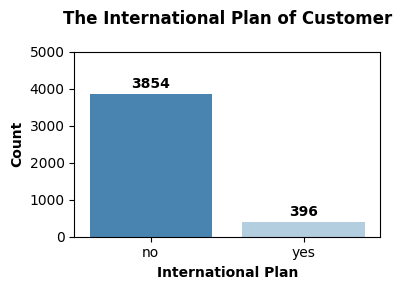

In [99]:
# # visualize each variable (international plan) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='international_plan',
                  palette="Blues_r",
                  order= df.international_plan.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,5000)
ax.set_title("The International Plan of Customer", weight='bold',pad= 20)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('International Plan', weight='bold')
plt.tight_layout()
plt.show()

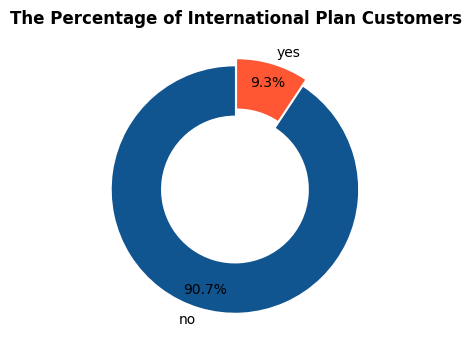

In [37]:
# Count values for the 'churn' column
churn_counts = df['international_plan'].value_counts()

# Create a donut chart
plt.figure(figsize=(6, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
        colors=['#105490', '#FF5733'], startangle=90,
        wedgeprops=dict(width=0.4), pctdistance=0.85,
        explode=[0.03, 0.03])
plt.title('The Percentage of International Plan Customers', weight='bold')
plt.show()

**Observasi:**
- **Kebanyakan** customer **tidak** menggunakan paket international yaitu sebesar 3854 orang (90.7%), sedangkan hanya **sedikit** sekali yang menggunakan paket internasional jika dibandingkan dengan yang tidak menggunakan paket international yaitu sebesar 396 orang (9.3%).

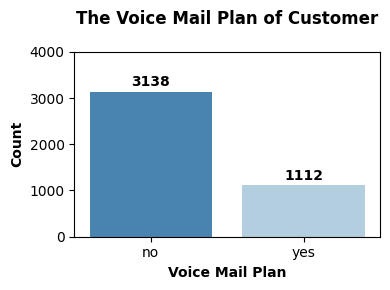

In [41]:
# # visualize each variable (voice mail plan) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='voice_mail_plan',
                  palette="Blues_r",
                  order= df.voice_mail_plan.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,4000)
ax.set_title("The Voice Mail Plan of Customer", weight='bold',pad= 20)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Voice Mail Plan', weight='bold')
plt.tight_layout()
plt.show()

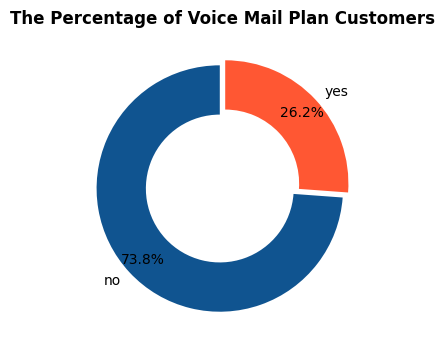

In [40]:
# Count values for the 'churn' column
churn_counts = df['voice_mail_plan'].value_counts()

# Create a donut chart
plt.figure(figsize=(6, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
        colors=['#105490', '#FF5733'], startangle=90,
        wedgeprops=dict(width=0.4), pctdistance=0.85,
        explode=[0.03, 0.03])
plt.title('The Percentage of Voice Mail Plan Customers', weight='bold')
plt.show()

**Observasi:**
- **Lebih banyak** customer **tidak** menggunakan paket voice mail yaitu sebesar 3138 orang (73,8%), daripada yang menggunakan paket voice mail yaitu sebesar 1112 orang (26,2%).

####**- Numerical Features/Variables**

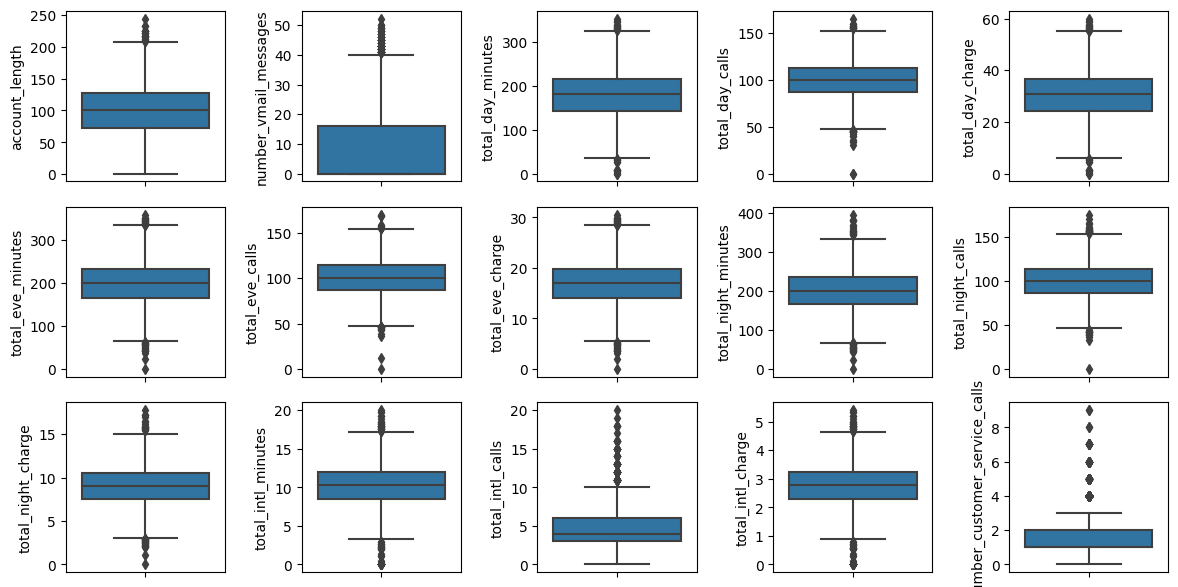

In [87]:
# adjust the figure size for better readability
plt.figure(figsize=(12,8))

# plotting
for i, col in enumerate(num_var):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df, y= col)
    plt.tight_layout(pad=1.5)

**Observasi:**
- Dari boxplot terlihat bahwa, keseluruhan kolom terdapat outliers, akan tetapi nampaknya masih terdapat banyak kolom yang terdistribusi normal.

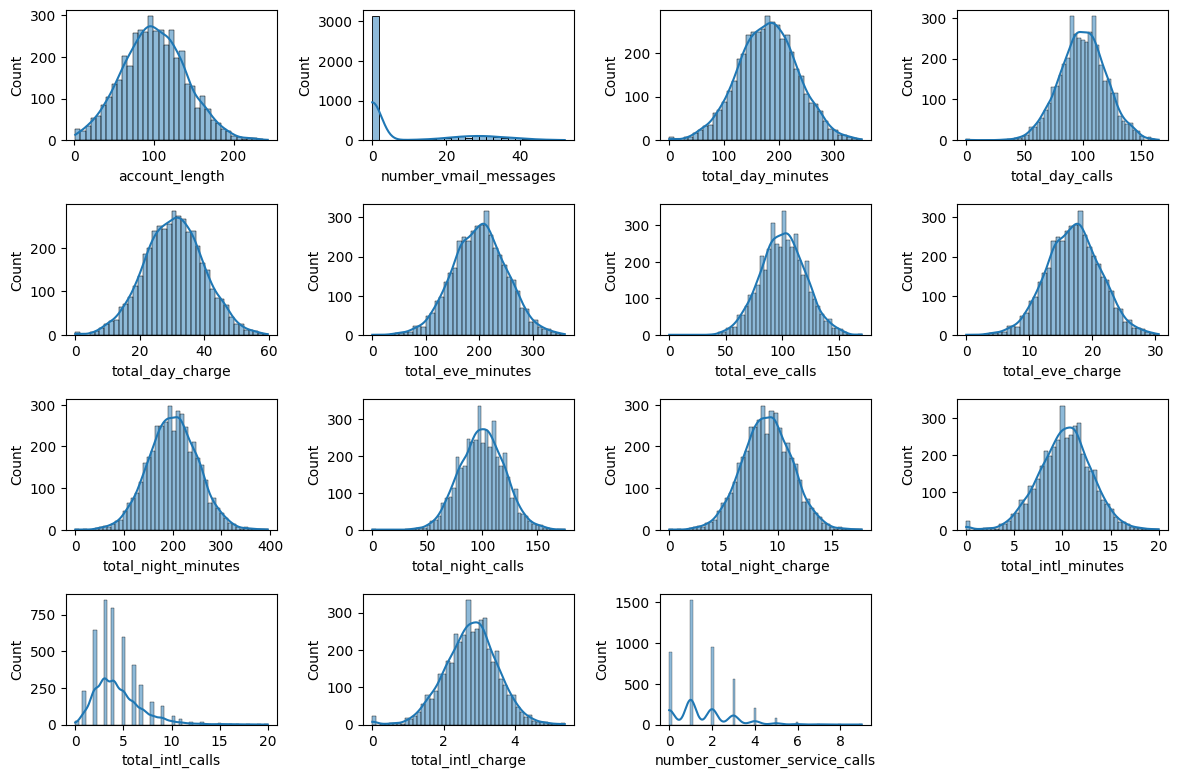

In [88]:
# adjust the figure size for better readability
plt.figure(figsize=(12,8))

# plotting
for i, col in enumerate(num_var):
    plt.subplot(4,4,i+1)
    sns.histplot(data=df, x= col, kde=True)
    plt.tight_layout(pad=1.5)

**Observasi:**
- Dari histplot terlihat bahwa kolom **number_vmail_messages**, **total_eve_calls**, **total_intl_calls**, **total_intl_charge**, dan **number_customer_service_calls** nampaknya memiliki distribusi yang tidak normal.
- Terutama pada kolom **total_intl_calls** dan **number_customer_service_calls**, terlihat memiliki **distribusi yang miring (*positif skeweness*)**

In [121]:
def check_normal_distribution_with_shapiro(df):

    # List untuk menyimpan hasil
    results = []

    for col in num_var:
        # Shapiro-Wilk Test
        shapiro_test = stats.shapiro(df[col])

        # Menarik kesimpulan berdasarkan p-value
        if shapiro_test.pvalue > 0.05:
            conclusion = f"Distribusi normal."
        else:
            conclusion = f"Distribusi tidak normal."

        results.append([col, 'Shapiro-Wilk Test', shapiro_test.pvalue, conclusion])

    # Membuat DataFrame dari hasil
    results_df = pd.DataFrame(results, columns=['Variable', 'Normality Test', 'p-value', 'Conclusion'])

    return results_df

# Menggunakan fungsi untuk mendapatkan hasil
normality_results_with_conclusion = check_normal_distribution_with_shapiro(df)
normality_results_with_conclusion


,Variable,Normality Test,p-value,Conclusion
0,account_length,Shapiro-Wilk Test,2.280266e-05,Distribusi tidak normal.
1,number_vmail_messages,Shapiro-Wilk Test,0.000000e+00,Distribusi tidak normal.
2,total_day_minutes,Shapiro-Wilk Test,6.013939e-01,Distribusi normal.
3,total_day_calls,Shapiro-Wilk Test,2.208200e-04,Distribusi tidak normal.
4,total_day_charge,Shapiro-Wilk Test,6.027986e-01,Distribusi normal.
5,total_eve_minutes,Shapiro-Wilk Test,5.298636e-01,Distribusi normal.
6,total_eve_calls,Shapiro-Wilk Test,1.122624e-02,Distribusi tidak normal.
7,total_eve_charge,Shapiro-Wilk Test,5.251766e-01,Distribusi normal.
8,total_night_minutes,Shapiro-Wilk Test,7.766871e-01,Distribusi normal.
9,total_night_calls,Shapiro-Wilk Test,5.320767e-02,Distribusi normal.


In [125]:
def check_normal_distribution_ks_with_kstest(df):

    # List untuk menyimpan hasil
    results = []

    for col in num_var:
        # Kolmogorov-Smirnov Test dengan parameter distribusi sesuai dengan data
        mean_val, std_val = df[col].mean(), df[col].std()
        ks_test = stats.kstest(df[col], 'norm', args=(mean_val, std_val))

        # Menarik kesimpulan berdasarkan p-value
        if ks_test.pvalue > 0.05:
            conclusion = f"Distribusi normal."
        else:
            conclusion = f"Distribusi tidak normal."

        results.append([col, 'Kolmogorov-Smirnov Test', ks_test.pvalue, conclusion])

    # Membuat DataFrame dari hasil
    results_df = pd.DataFrame(results, columns=['Variable', 'Normality Test', 'p-value', 'Conclusion'])

    return results_df

# Menggunakan fungsi untuk mendapatkan hasil
normality_results_ks_conclusion = check_normal_distribution_ks_with_kstest(df)
normality_results_ks_conclusion


,Variable,Normality Test,p-value,Conclusion
0,account_length,Kolmogorov-Smirnov Test,3.825571e-01,Distribusi normal.
1,number_vmail_messages,Kolmogorov-Smirnov Test,0.000000e+00,Distribusi tidak normal.
2,total_day_minutes,Kolmogorov-Smirnov Test,9.700206e-01,Distribusi normal.
3,total_day_calls,Kolmogorov-Smirnov Test,1.812074e-01,Distribusi normal.
4,total_day_charge,Kolmogorov-Smirnov Test,9.660155e-01,Distribusi normal.
5,total_eve_minutes,Kolmogorov-Smirnov Test,8.657274e-01,Distribusi normal.
6,total_eve_calls,Kolmogorov-Smirnov Test,3.294768e-01,Distribusi normal.
7,total_eve_charge,Kolmogorov-Smirnov Test,8.828636e-01,Distribusi normal.
8,total_night_minutes,Kolmogorov-Smirnov Test,9.837433e-01,Distribusi normal.
9,total_night_calls,Kolmogorov-Smirnov Test,2.275953e-01,Distribusi normal.


**Observasi:**
- Karena sampel berjumlah besar (>100), maka uji normalitas yang lebih **relevan** digunakan yaitu **Kolmogorov-Smirnov Test**. [cek alasannya disini](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/#:~:text=The%20Shapiro%E2%80%93Wilk%20test%20is,taken%20from%20normal%20distributed%20population.).

- Kolom yang **tidak** dianggap memiliki distribusi normal yaitu **number_vmail_messages**, **total_intl_minutes**, **total_intl_calls**,**total_intl_charge**,**number_customer_service_calls** berdasarkan hasil uji Kolmogorov-Smirnov.

In [135]:
# Melihat statistik ringkasan (mean, min, max)
summary_stats = df.describe().loc[['mean', 'min', 'max']]

# Membuat DataFrame baru
summary_df = pd.DataFrame(summary_stats).reset_index()
summary_df.rename(columns={'index': 'Statistic'}, inplace=True)

# Menampilkan DataFrame baru
summary_df.T

,0,1,2
Statistic,mean,min,max
account_length,100.236235,1.0,243.0
number_vmail_messages,7.631765,0.0,52.0
total_day_minutes,180.2596,0.0,351.5
total_day_calls,99.907294,0.0,165.0
total_day_charge,30.644682,0.0,59.76
total_eve_minutes,200.173906,0.0,359.3
total_eve_calls,100.176471,0.0,170.0
total_eve_charge,17.015012,0.0,30.54
total_night_minutes,200.527882,0.0,395.0


##**Bivariate Analysis**

###**- Categorical Features/Variables**

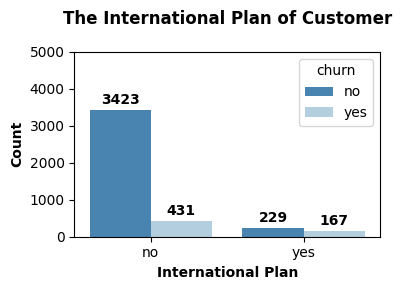

In [507]:
# # visualize each variable (international plan) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='international_plan',
                  palette="Blues_r",
                  hue= 'churn',
                  order= df.international_plan.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,5000)
ax.set_title("The International Plan of Customer", weight='bold',pad= 20)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('International Plan', weight='bold')
plt.tight_layout()
plt.show()

**Observasi:**
- Dari barplot diatas terlihat bahwa, banyak customer yang churn dengan tidak menggunakan paket panggilan international (431 orang), daripada yang menggunakan paket international (167 orang).

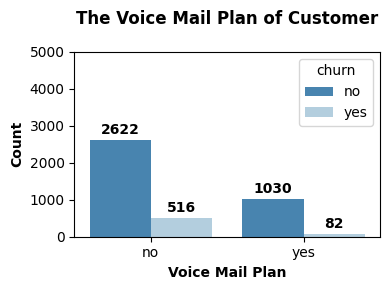

In [509]:
# # visualize each variable (international plan) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='voice_mail_plan',
                  palette="Blues_r",
                  hue= 'churn',
                  order= df.international_plan.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,5000)
ax.set_title("The Voice Mail Plan of Customer", weight='bold',pad= 20)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Voice Mail Plan', weight='bold')
plt.tight_layout()
plt.show()

###**- Numerical Features/Variables**

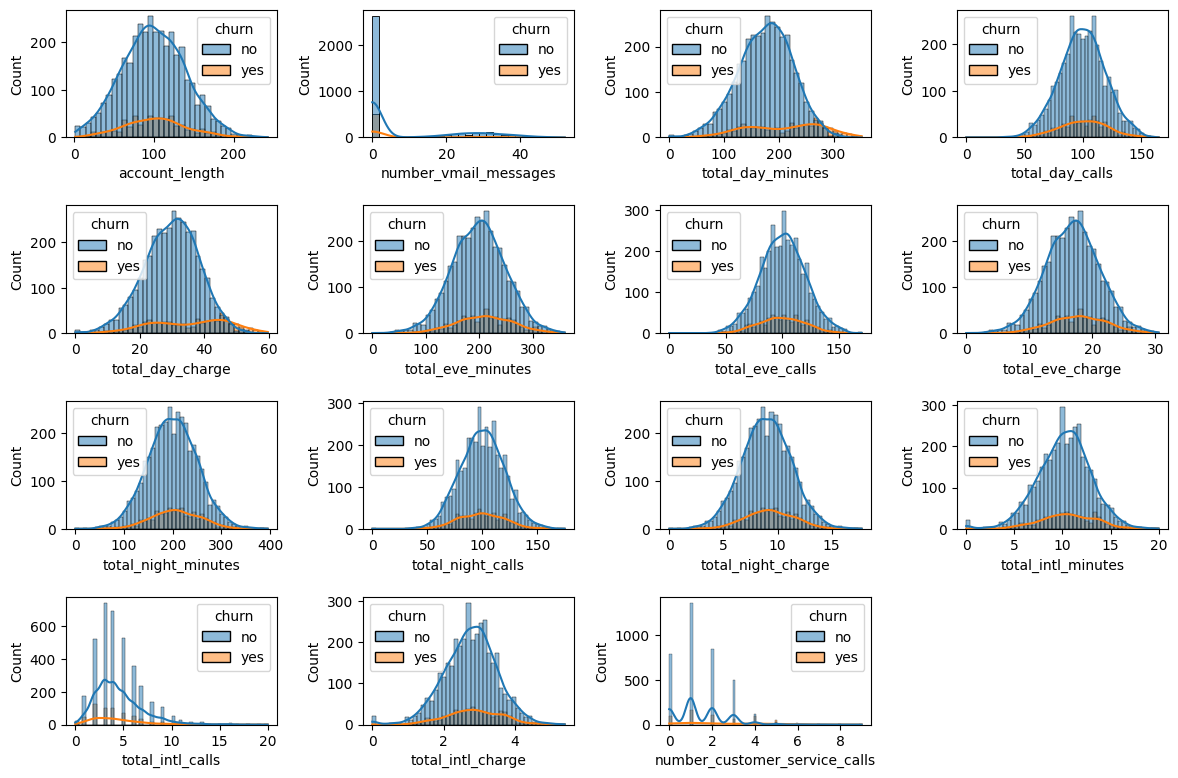

In [510]:
# adjust the figure size for better readability
plt.figure(figsize=(12,8))

# plotting
for i, col in enumerate(num_var):
    plt.subplot(4,4,i+1)
    sns.histplot(data=df, x= col, kde=True, hue='churn')
    plt.tight_layout(pad=1.5)

##**Deep-Dive Questions**

**- Berapa rata-rata masa umur akun customer yang melakukan churn dan yang tidak?**

In [525]:
# Calculate the average account_length for each churn category
average_account_length = df.groupby('churn')['account_length'].mean().reset_index()

average_account_length

,churn,account_length
0,no,99.924973
1,yes,102.137124


**- Customer dari negara bagian mana yang melakukan churn dan memiliki tagihan harian tertinggi dan terendah?**

In [516]:
# Filter the data to only include rows where churn is 'yes'
churn_df = df[df['churn'] == 'yes']

# Find the state and total_day_charge where total_day_charge is maximum
max_charge = churn_df[churn_df['total_day_charge'] == churn_df['total_day_charge'].max()][['state', 'total_day_charge']]

# Find the state and total_day_charge where total_day_charge is minimum
min_charge = churn_df[churn_df['total_day_charge'] == churn_df['total_day_charge'].min()][['state', 'total_day_charge']]

summary_df = pd.DataFrame({
    'Description': ['Highest Day Charge', 'Lowest Day Charge'],
    'State': [max_charge['state'].values[0], min_charge['state'].values[0]],
    'Total Day Charge': [max_charge['total_day_charge'].values[0], min_charge['total_day_charge'].values[0]]
})

summary_df


,Description,State,Total Day Charge
0,Highest Day Charge,NJ,59.76
1,Lowest Day Charge,SD,0.00


**- Berapa biaya tagihan panggilan harian tertinggi dan terendah dari customer yang churn dan yang tidak?**

In [520]:
# Grouping by 'churn' and calculating the maximum and minimum values for 'total_day_charge'
day_charge_grouped = df.groupby('churn')['total_day_charge'].agg(['max', 'min'])

day_charge_grouped

,max,min
churn,,
no,53.35,0.0
yes,59.76,0.0


**- Berapa biaya tagihan panggilan petang tertinggi dan terendah dari customer yang churn dan yang tidak?**

In [518]:
# Grouping by 'churn' and calculating the maximum and minimum values for 'total_eve_charge'
eve_charge_grouped = df.groupby('churn')['total_eve_charge'].agg(['max', 'min'])

eve_charge_grouped

,max,min
churn,,
no,30.54,0.00
yes,29.70,6.03


**- Berapa biaya tagihan panggilan malam tertinggi dan terendah dari customer yang churn dan yang tidak?**

In [519]:
# Grouping by 'churn' and calculating the maximum and minimum values for 'total_night_charge'
night_charge_grouped = df.groupby('churn')['total_night_charge'].agg(['max', 'min'])

night_charge_grouped

,max,min
churn,,
no,17.77,0.00
yes,17.17,2.13


**- Berapa biaya rata-rata tagihan panggilan harian, petang, dan malam dari customer yang churn dan yang tidak?**

In [523]:
# Group by 'churn' and compute the mean for the specified columns
grouped_data = df.groupby('churn')[['total_day_charge', 'total_eve_charge', 'total_night_charge']].mean()

grouped_data

,total_day_charge,total_eve_charge,total_night_charge
churn,,,
no,29.844948,16.878743,8.981131
yes,35.528679,17.847207,9.285033


**- Berapa total panggilan harian tertinggi dan terendah dari customer yang melakukan churn  dan yang tidak?**

In [527]:
# Grouping data by 'churn' and calculating the max and min of 'total_day_calls'
day_calls_grouped = df.groupby('churn')['total_day_calls'].agg(['max', 'min'])

day_calls_grouped

,max,min
churn,,
no,160,0
yes,165,0


**- Berapa total panggilan petang tertinggi dan terendah dari customer yang melakukan churn  dan yang tidak?**

In [45]:
# Grouping data by 'churn' and calculating the max and min of 'total_eve_calls'
eve_calls_grouped = df.groupby('churn')['total_eve_calls'].agg(['max', 'min'])

eve_calls_grouped


,max,min
churn,,
no,170,0
yes,168,48


**- Berapa total panggilan malam tertinggi dan terendah dari customer yang melakukan churn  dan yang tidak?**

In [46]:
# Grouping data by 'churn' and calculating the max and min of 'total_night_calls'
night_calls_grouped = df.groupby('churn')['total_night_calls'].agg(['max', 'min'])

night_calls_grouped

,max,min
churn,,
no,175,0
yes,158,42


**- Berapa rata-rata panggilan harian, petang, dan malam dari customer yang churn dan yang tidak?**

In [47]:
# Group by 'churn' and compute the mean for the specified columns
average_calls = df.groupby('churn')[['total_day_calls', 'total_eve_calls', 'total_night_calls']].mean()

average_calls

,total_day_calls,total_eve_calls,total_night_calls
churn,,,
no,99.813801,100.231380,99.942771
yes,100.478261,99.841137,99.209030


**- Berapa jumlah panggilan tertinggi dan terendah ke customer service dari customer yang churn dan yang tidak?**

In [550]:
# Group by 'churn' and compute the mean for the specified columns
num_cs_calls = df.groupby('churn')[['number_customer_service_calls']].agg(['max', 'min'])

num_cs_calls

number_customer_service_calls    
                                max min
churn                                  
no                                8   0
yes                               9   0

**- Berapa rata-rata panggilan ke customer service dari customer yang churn dan yang tidak?**

In [551]:
# Group by 'churn' and compute the mean for the specified columns
average_cs_calls = df.groupby('churn')[['number_customer_service_calls']].mean()

average_cs_calls

,number_customer_service_calls
churn,
no,1.441676
yes,2.275920


In [54]:
df.total_day_charge.mean()

30.644682352941174

In [58]:
churn_pct = df[df['churn']=='yes'].groupby(['total_day_calls','total_day_charge',
                                            'total_eve_calls','total_eve_charge']).size().reset_index(name='total_customers')
churn_pct['total_customers'] = churn_pct.sum(axis=1)
churn_pct = churn_pct.sort_values(by=['total_customers'], ascending=False)
churn_pct

,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_customers
585,143,49.61,134,18.22,345.83
583,141,51.68,127,22.45,343.13
354,106,45.32,168,22.51,342.83
579,141,39.30,136,22.76,340.06
502,120,45.68,147,25.59,339.27
...,...,...,...,...,...
37,68,28.46,74,12.22,183.68
114,83,26.83,56,13.73,180.56
46,71,21.96,68,18.20,180.16
1,42,22.46,88,11.81,165.27


#**5. Feature Engineering**

###**- Data Encoding**

In [251]:
df_mod = df.copy()

In [252]:
df_mod

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [253]:
# Initial object LabelEncoder
le = LabelEncoder()

# perform label encoding to column 'passing_score'
df_mod['churn'] = le.fit_transform(df_mod['churn'])

In [219]:
# encoding categorical features with replace
df_mod['international_plan'] = df_mod['international_plan'].replace({'no': 0, 'yes': 1})
df_mod['voice_mail_plan'] = df_mod['voice_mail_plan'].replace({'no': 0, 'yes': 1})

In [254]:
# encoding categorical features with TargetEncoder
encoder = TargetEncoder()
df_mod[cat_var] = encoder.fit_transform(df_mod[cat_var], df_mod['churn'])

In [255]:
df_mod

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126324,107,0.111832,0.073741,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.270768,137,0.111832,0.164436,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0.126324,84,0.421717,0.164436,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,0.204934,75,0.421717,0.164436,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.157287,121,0.111832,0.073741,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.212322,83,0.111832,0.164436,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,0.136691,73,0.111832,0.164436,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,0.087632,75,0.111832,0.164436,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,0.052244,50,0.111832,0.073741,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


###**- Feature Selection**

####**- Check Multicollinearity**

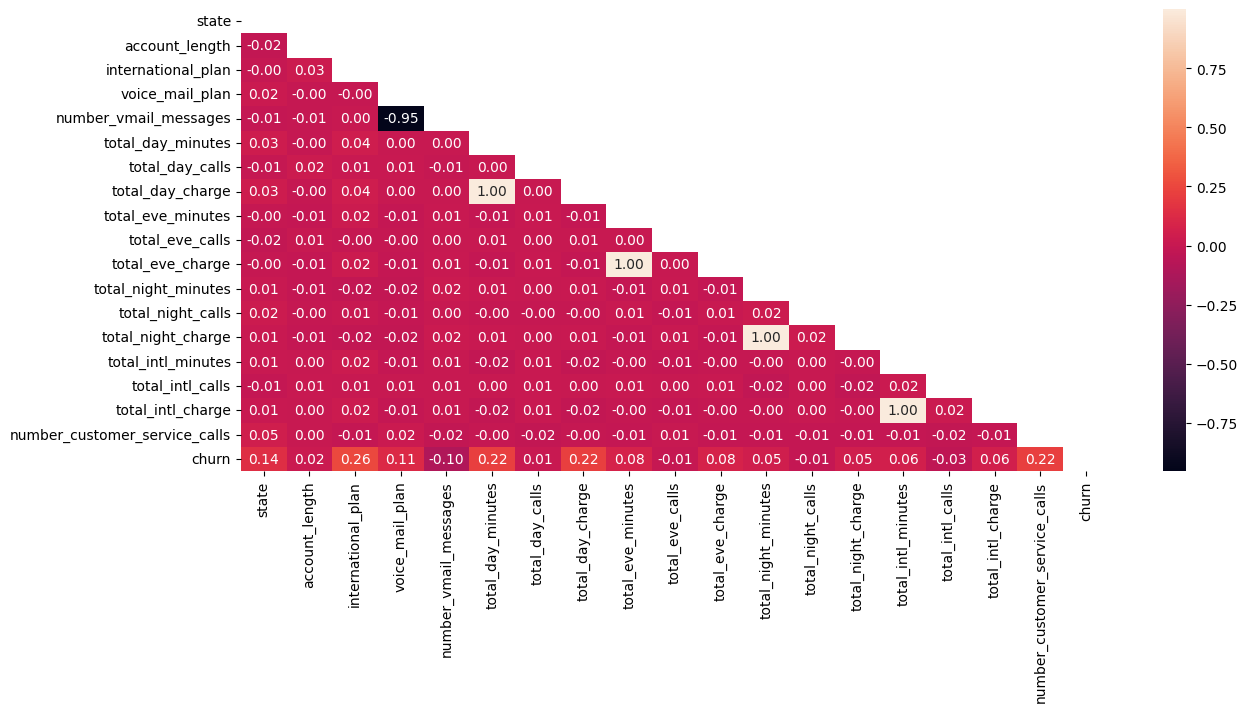

In [257]:
# check correlation all features with heatmap
corr_ = df_mod.corr()
plt.figure(figsize=(14,6))
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(df_mod.corr(), annot=True, fmt='.2f', mask=mask)
plt.show()

**Observasi:**
- Dari hasil heatmap diatas, terlihat bahwa terdapat multikolinearity antara:
  - kolom **number_vmail_messages** dengan **voice_mail_plan** = 0.95
  - kolom **total_day_charge** dengan **total_day_minutes** = 1.00
  - kolom **total_eve_charge** dengan **total_eve_minutes** = 1.00
  - kolom **total_night_charge** dengan **total_night_minutes** = 1.00
  - kolom **total_intl_charge** dengan **total_intl_minutes** = 1.00

- Pengambilan keputusan:
  - Menghapus salah satu kolom fitur yang saling berkorelasi tinggi (multikolinearity).
  - Kolom yang akan di drop: **total_day_minutes**, **total_eve_minutes**, **total_night_minutes**, dan **total_intl_minutes**.

In [258]:
# drop several columns with multicollinearity

df_mod = df_mod.drop(columns=['number_vmail_messages','total_day_minutes',
                              'total_eve_minutes','total_night_minutes',
                              'total_intl_minutes'])

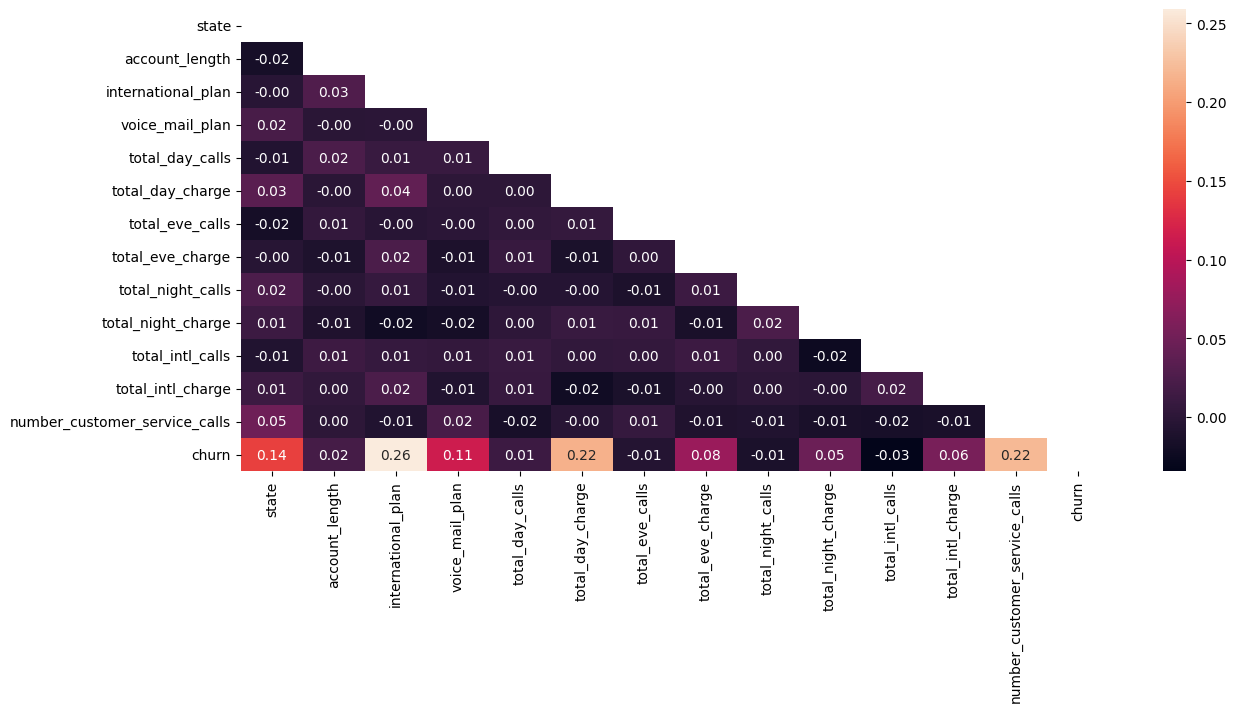

In [259]:
# check again correlation all features with heatmap
corr_ = df_mod.corr()
plt.figure(figsize=(14,6))
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(df_mod.corr(), annot=True, fmt='.2f', mask=mask)
plt.show()

####**- Check VIF Score**

In [260]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_VIF(data):
    X = add_constant(data.iloc[:,:-1])
    vif_data = pd.DataFrame([variance_inflation_factor(X.values, i)
                             for i in range(len(X.columns))],
                            index = X.columns).reset_index()
    vif_data.columns = ['feature','VIF']
    vif_data = vif_data.loc[vif_data.feature!='const']

    # Format kolom VIF untuk menghindari notasi ilmiah
    vif_data['VIF'] = vif_data['VIF'].apply(lambda x: '{:.6f}'.format(x))

    return vif_data

In [262]:
calculate_VIF(df_mod)

,feature,VIF
1,state,1.005683
2,account_length,1.001970
3,international_plan,1.004223
4,voice_mail_plan,1.001603
5,total_day_calls,1.001275
6,total_day_charge,1.003737
7,total_eve_calls,1.000876
8,total_eve_charge,1.001706
9,total_night_calls,1.001750
10,total_night_charge,1.002715


**Observasi:**
- Terlihat dari VIF Score bahwa **tidak** terjadi multikolinearitas pada semua fitur (VIF score < 10) (setelah didrop kolom yang saling multikolinearitas).

#**6. Modeling**

In [406]:
# check dataframe
df_ml = df.copy()
df_ml = df_ml.drop(columns=['number_vmail_messages','total_day_minutes',
                              'total_eve_minutes','total_night_minutes',
                              'total_intl_minutes'])
df_ml

,state,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,1,no
1,NJ,137,no,no,114,41.38,110,10.30,104,7.32,5,3.29,0,no
2,OH,84,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,2,no
3,OK,75,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,3,no
4,MA,121,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,no,no,70,32.01,88,20.72,79,9.62,6,2.78,0,no
4246,WV,73,no,no,89,30.24,82,11.15,89,8.38,6,3.11,3,no
4247,NC,75,no,no,101,29.02,126,16.41,104,5.81,7,1.86,1,no
4248,HI,50,no,yes,127,40.07,126,18.96,116,13.39,5,2.67,2,no


##**- Split Train & Test**

In [407]:
# Initial object LabelEncoder
le = LabelEncoder()

# perform label encoding to column 'passing_score'
df_ml['churn'] = le.fit_transform(df_ml['churn'])

In [408]:
# split dataset
from sklearn.model_selection import train_test_split

X = df_ml.drop(columns=['churn'])
y = df_ml['churn']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.20, random_state= 42)

In [409]:
# check sample after split
for x in [X_train, y_train, X_test, y_test]:
    print(x.shape)

(3400, 13)
(3400,)
(850, 13)
(850,)


In [410]:
def shannon_entropy_score(data, target_column):
    from collections import Counter
    from numpy import log


    n = len(data[target_column])
    classes = [(clas,float(count)) for clas,count in Counter(data[target_column]).items()]
    k = len(classes)

    H = -np.sum([(count/n) * np.log((count/n)) for clas,count in classes]) #shannon entropy
    B = H/np.log(k)

    return (f'Shannon Entropy Score: {B}')

In [398]:
shannon_entropy_score(df_ml,'churn')

'Shannon Entropy Score: 0.5860844728035216'

- Dari skor shannon entropy dapat dikatakan bahwa kelas dalam label memiliki proporsi yang tidak seimbang. [cek refensi](https://www.the-analytics.club/how-to-check-if-data-is-imbalanced/#:~:text=Shannon%20entropy%20is%20a%20measure,Shannon%20entropy%20is%20more%20imbalanced.)
- Semakin besar skor shannon entropy (mendekati 1) menunjukkan bahwa proporsi kelas pada label semakin seimbang (balance). Sebaliknya apabila skor semakin kecil (mendekati 0), maka proporsi kelas pada label semakin tidak seimbang (imbalance).
- Keputusan yang diambil disini yaitu kita ingin melakukan oversampling dengan SMOTE untuk lebih menyeimbangkan kelas dalam label yang ada dalam dataset.
- Keputusan melakukan oversampling disesuaikan dengan konteks analisa dari dataset yang digunakan.

##**- Pipeline**

In [422]:
df_ml.columns

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'total_day_calls', 'total_day_charge', 'total_eve_calls',
       'total_eve_charge', 'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [424]:
# define categorical feature
cat_feats = ['state', 'international_plan','voice_mail_plan']

# define numerical feature
num_feats = ['account_length','total_day_calls','total_day_charge',
             'total_eve_calls','total_eve_charge','total_night_calls',
             'total_night_charge','total_intl_calls','total_intl_charge',
             'number_customer_service_calls']

In [425]:
# use ColumnTransformer to encode features for pipeline purposes
preprocessor = ColumnTransformer(
      transformers=[('categorical', TargetEncoder(), cat_feats),
                    ('numerical', RobustScaler(), num_feats)])

In [426]:
set_config(display='diagram')

##**- Modeling**

###**- Benchmark Model**

In [427]:
# define the ml algoritms
knn = KNeighborsClassifier()
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svc = SVC(random_state=42)

In [428]:
# define the metrics evaluation
metrics = ['accuracy','precision','recall','f1_micro','roc_auc','average_precision']

In [429]:
# create empty list for save result after cross validation
models_train = []
models_test = []
scores_train = []
scores_test = []

######**Train Model**

In [430]:
ml_models = [knn, logreg, dt, rf, xgb, svc]

for i in ml_models:
    skfold=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    estimator=Pipeline([
            ('preprocessor', preprocessor),
            ('resampling', SMOTE(random_state=42)),
            ('model',i)])
    estimator.fit(X_train, y_train)

    cross_val_train = cross_validate(estimator,
                               X_train, y_train,
                               cv=skfold,
                               scoring= metrics,
                               n_jobs=-1)
    models_train.append(f'{i.__class__.__name__}')
    scores_train.append(list(cross_val_train.values())[2:])

###**- Evaluation Metric Score (Train Model)**

In [432]:
df_models_train = pd.DataFrame([[scores_train[i][j].mean() for j in range(len(metrics))] for i in range(len(models_train))],
                         index=models_train,
                         columns=metrics).sort_values('average_precision', ascending=False)

df_models_train

,accuracy,precision,recall,f1_micro,roc_auc,average_precision
XGBClassifier,0.956471,0.874265,0.807270,0.956471,0.915311,0.863760
RandomForestClassifier,0.946471,0.841316,0.763387,0.946471,0.918052,0.843694
SVC,0.882059,0.563177,0.746631,0.882059,0.885205,0.658793
DecisionTreeClassifier,0.900882,0.622833,0.752970,0.900882,0.839015,0.505983
LogisticRegression,0.783824,0.367313,0.744681,0.783824,0.832259,0.483636
KNeighborsClassifier,0.764118,0.323719,0.617154,0.764118,0.757713,0.333072


######**Test Model**

In [433]:
ml_models = [knn, logreg, dt, rf, xgb, svc]

for i in ml_models:
    skfold=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    estimator=Pipeline([
            ('preprocessor', preprocessor),
            ('resampling', SMOTE(random_state=42)),
            ('model',i)])
    estimator.fit(X_test, y_test)

    cross_val_test = cross_validate(estimator,
                               X_test, y_test,
                               cv=skfold,
                               scoring= metrics,
                               n_jobs=-1)
    models_test.append(f'{i.__class__.__name__}')
    scores_test.append(list(cross_val_test.values())[2:])

###**- Evaluation Metric Score (Test Model)**

In [436]:
df_models_test = pd.DataFrame([[scores_test[i][j].mean() for j in range(len(metrics))] for i in range(len(models_test))],
                         index=models_test,
                         columns=metrics).sort_values('average_precision', ascending=False)

df_models_test

,accuracy,precision,recall,f1_micro,roc_auc,average_precision
XGBClassifier,0.924706,0.808885,0.608333,0.924706,0.875228,0.740710
RandomForestClassifier,0.902353,0.704199,0.533333,0.902353,0.838927,0.640866
SVC,0.828235,0.419737,0.525000,0.828235,0.758219,0.496425
LogisticRegression,0.724706,0.298655,0.700000,0.724706,0.749658,0.395368
DecisionTreeClassifier,0.824706,0.415866,0.566667,0.824706,0.716895,0.299026
KNeighborsClassifier,0.689412,0.249625,0.591667,0.689412,0.684247,0.286669


###**- Tuned Model with Hyperparameter Tuning**

In [437]:
tuned_models = ['RandomForestClassifierTuned', 'XGBClassifierTuned']
fine_tuned_models = []
tuned_scores = []

#####**Random Forest (Train Model)**

In [438]:
%%time
# define the parameters for random forest model's tuned
rfr_params = {
    'forest__n_estimators': list(np.arange(10, 300)),
    'forest__max_depth': list(np.arange(1, 20)),
    'forest__min_samples_split': [2, 5, 10],
    'forest__min_samples_leaf': [1, 2, 3, 4, 5],
    'forest__max_features': ['auto', 'sqrt'],
    'forest__bootstrap': [True, False],
    'forest__criterion': ["gini", "entropy"]
}

Random_Forest_tuned = RandomForestClassifier(random_state=42)
forest_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('resampling', SMOTE(random_state=42)),
    ('forest',Random_Forest_tuned)])
forest_pipe_tuned.fit(X_train, y_train)

forest_cv_train = RandomizedSearchCV(forest_pipe_tuned,
                               rfr_params,
                               scoring=metrics,
                               refit='average_precision',
                               error_score='raise',
                               n_jobs=-1,
                               verbose=1,
                               cv=skfold)
forest_cv_train.fit(X_train, y_train)
print(forest_cv_train.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'forest__n_estimators': 243, 'forest__min_samples_split': 5, 'forest__min_samples_leaf': 2, 'forest__max_features': 'sqrt', 'forest__max_depth': 10, 'forest__criterion': 'entropy', 'forest__bootstrap': False}
CPU times: user 9.25 s, sys: 454 ms, total: 9.7 s
Wall time: 3min 39s


#####**XGBoost (Train Model)**

In [439]:
%%time
# Define the parameters for XGBoost tuned
xgb_params = {
    'xgb__n_estimators': [100, 200, 250, 400, 500],
    'xgb__max_depth': [5, 10, 15, 20],
    'xgb__learning_rate': [0.05, 0.01, 0.1],
    'xgb__subsample': [0.5, 1],
    'xgb__colsample_bytree': [0.8, 0.9],
    'xgb__min_child_weight': [1],
    'xgb__gamma': [i/10.0 for i in range(0, 6)],
    'xgb__reg_lambda': [0, 0.5, 1, 1.5, 2, 3, 4.5]
}

XGBoost_tuned = XGBClassifier(random_state=42)
xgb_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('resampling', SMOTE(random_state=42)),
    ('xgb',XGBoost_tuned)])
xgb_pipe_tuned.fit(X_train, y_train)

xgb_cv_train = RandomizedSearchCV(xgb_pipe_tuned,
                               xgb_params,
                               scoring=metrics,
                               refit='average_precision',
                               error_score='raise',
                               n_jobs=-1,
                               verbose=1,
                               cv=skfold)
xgb_cv_train.fit(X_train, y_train)
print(xgb_cv_train.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'xgb__subsample': 1, 'xgb__reg_lambda': 1.5, 'xgb__n_estimators': 200, 'xgb__min_child_weight': 1, 'xgb__max_depth': 20, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0.0, 'xgb__colsample_bytree': 0.8}
CPU times: user 4.97 s, sys: 439 ms, total: 5.41 s
Wall time: 2min 8s


###**- Evaluation Metric Score (Train Tuned Model)**

In [440]:
fine_tuned_models.append(forest_cv_train.best_estimator_)
fine_tuned_models.append(xgb_cv_train.best_estimator_)

for i in fine_tuned_models:
    cross_val = cross_validate(i, X_train, y_train, cv= skfold, scoring = metrics)
    tuned_scores.append(list(cross_val.values())[2:])

data = []
for i in range(len(fine_tuned_models)):
    for j in range(len(metrics)):
        data.append(tuned_scores[i][j].mean())

reshaped_data = np.reshape(data, (len(fine_tuned_models), len(metrics)))

df_models = pd.DataFrame(reshaped_data, index = tuned_models, columns = metrics)
df_models = df_models.sort_values('average_precision', ascending=False)
df_models

,accuracy,precision,recall,f1_micro,roc_auc,average_precision
XGBClassifierTuned,0.957941,0.887259,0.803147,0.957941,0.923363,0.878446
RandomForestClassifierTuned,0.947059,0.826413,0.788431,0.947059,0.922601,0.855366


In [441]:
xgb_tuned = xgb_cv_train.best_estimator_
forest_tuned = forest_cv_train.best_estimator_

####**PR-AUC (Precision-Recall Curve)**

In [442]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def pr_auc_plot(model, X_test, y_test):
    # Predict the probability of a positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculates precision, recall, and thresholds using the precision_recall_curve function
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

    # Calculates the PR-AUC (Precision-Recall Area Under the Curve) value using the auc function
    pr_auc = auc(recall, precision)

    # Create PR-AUC plots
    plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

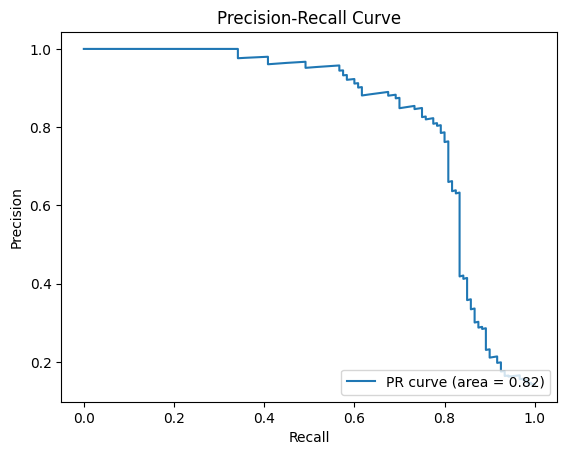

In [445]:
pr_auc_plot(forest_tuned, X_test, y_test)

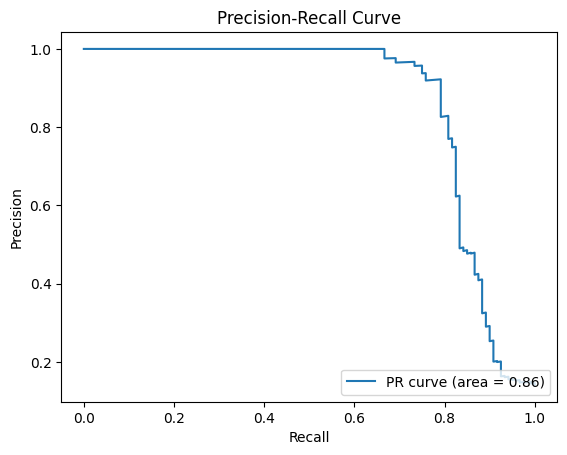

In [446]:
pr_auc_plot(xgb_tuned, X_test, y_test)

####**Confusion Matrix**

In [447]:
def plot_confusion_matrix(model, x_test, y_test):
    # Predict class labels using models
    y_pred = model.predict(x_test)

    # Calculates the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a confusion matrix plot using a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

    # Customize the appearance of the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Show plot
    plt.show()

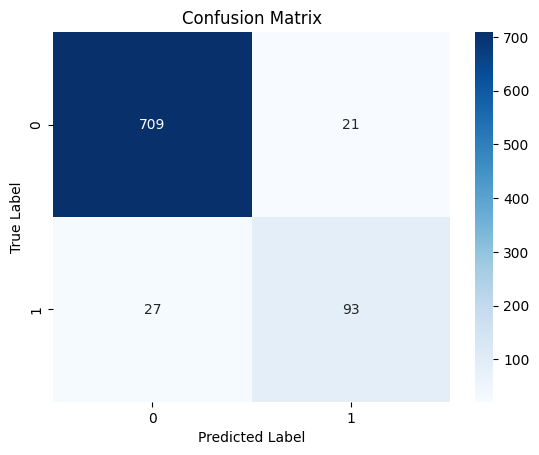

In [459]:
plot_confusion_matrix(forest_tuned, X_test, y_test)

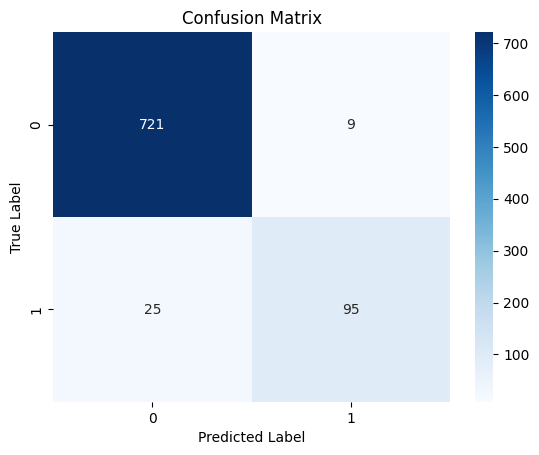

In [460]:
plot_confusion_matrix(xgb_tuned, X_test, y_test)

In [461]:
def classification_report_func(model, x_test, y_test):
    # Predict class labels using models
    y_pred = model.predict(x_test)

    # print classification report
    report = classification_report(y_test, y_pred)
    print(report)

In [462]:
classification_report_func(forest_tuned, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       730
           1       0.82      0.78      0.79       120

    accuracy                           0.94       850
   macro avg       0.89      0.87      0.88       850
weighted avg       0.94      0.94      0.94       850



In [463]:
classification_report_func(xgb_tuned, X_test, y_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       730
           1       0.91      0.79      0.85       120

    accuracy                           0.96       850
   macro avg       0.94      0.89      0.91       850
weighted avg       0.96      0.96      0.96       850



####**Feature Importance**

In [464]:
import matplotlib.pyplot as plt

def plot_feature_importances(pipeline, feature_names):
    # Mendapatkan model dari pipeline
    model = pipeline.steps[-1][1]

    # Memeriksa apakah model memiliki atribut 'feature_importances_'
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        raise AttributeError("Model tidak memiliki atribut 'feature_importances_'.")

    # Mengurutkan fitur berdasarkan importances
    indices = importances.argsort()[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]
    sorted_importances = importances[indices]

    # Membuat plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), sorted_importances, align='center')
    plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Fitur')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()


In [465]:
feature_names = ['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'total_day_calls', 'total_day_charge', 'total_eve_calls',
       'total_eve_charge', 'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

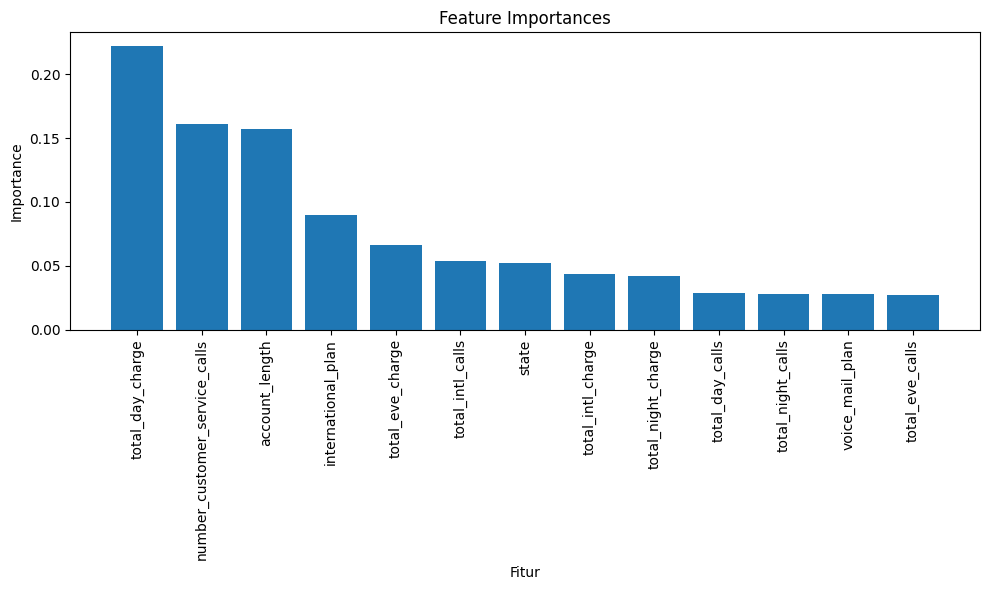

In [466]:
plot_feature_importances(forest_pipe_tuned, feature_names)

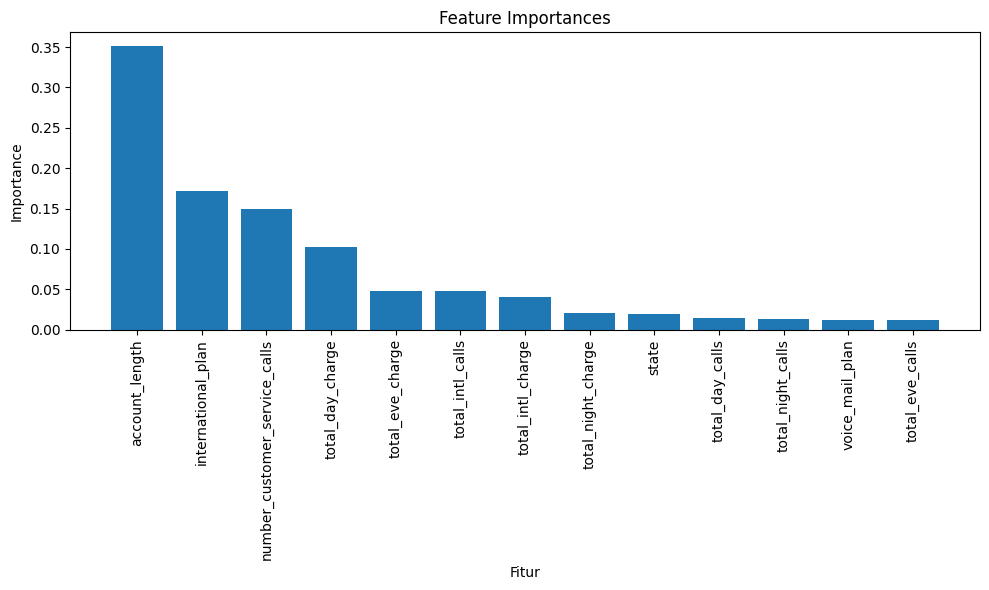

In [468]:
plot_feature_importances(xgb_pipe_tuned, feature_names)

#**7. Data Drift & Model Drift Detection**

In [498]:
import deepchecks
from deepchecks.tabular.suites import full_suite

In [501]:
cat_feats

['state', 'international_plan', 'voice_mail_plan']

In [504]:
ds_train = deepchecks.Dataset(df= X_train, label=y_train, cat_features= ['state', 'international_plan', 'voice_mail_plan'])
ds_test = deepchecks.Dataset(df= X_test, label=y_test, cat_features= ['state', 'international_plan', 'voice_mail_plan'])

/usr/local/lib/python3.10/dist-packages/deepchecks/__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead

/usr/local/lib/python3.10/dist-packages/deepchecks/__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead



In [505]:
fsuite = full_suite()
result = fsuite.run(train_dataset=ds_train,test_dataset=ds_test,model=forest_tuned)

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 29 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 29 seconds


In [473]:
result

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

In [384]:
fsuite = full_suite()
result = fsuite.run(train_dataset=ds_train,test_dataset=ds_test,model=xgb_tuned)

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 57 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 57 seconds


In [385]:
result

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite

#**8.Deployment**

##**- Save Best Model ML with pickle**

In [482]:
import pickle

In [483]:
pickle.dump(xgb_tuned,open('xgb_fix_tuned.pkl','wb'))

##**- Load Best Model ML for Model Inference**

In [484]:
model = pickle.load(open('xgb_fix_tuned.pkl','rb'))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  TargetEncoder(),
                                                  ['state',
                                                   'international_plan',
                                                   'voice_mail_plan']),
                                                 ('numerical', RobustScaler(),
                                                  ['account_length',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_calls',
                                                   'total_night_charge',
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'numb...
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=20, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [489]:
new_data = [{'state': 'WV',
             'account_length': 139,
             'international_plan': 'no',
             'voice_mail_plan': 'no',
             'total_day_calls': 118,
             'total_day_charge': 43.38,
             'total_eve_calls': 112,
             'total_eve_charge': 11.50,
             'total_night_calls': 106,
             'total_night_charge': 9.32,
             'total_intl_calls': 0,
             'total_intl_charge': 0,
             'number_customer_service_calls': 0,
             }
             ]

data_testing1= pd.DataFrame(new_data,index=[0])
data_testing1

,state,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,WV,139,no,no,118,43.38,112,11.5,106,9.32,0,0,0


In [491]:
def prediction(pred):
    if pred[0]==0:
        return "Customer = Not Churn"
    else:
        return "Customer = Churn"

In [492]:
pred = model.predict(data_testing1)

In [494]:
prediction(pred)

'Customer = Not Churn'

#**9. Conclusion**

##**Insight From EDA:**

Demografi Kustomer:

-

##**Evaluation ML Modeling**